In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("data/Student_Enrollment.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738465 entries, 0 to 738464
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   School Year         738465 non-null  int64  
 1   District Code       738465 non-null  int64  
 2   District            738465 non-null  object 
 3   School Code         738465 non-null  int64  
 4   Organization        738465 non-null  object 
 5   Race                738465 non-null  object 
 6   Gender              738465 non-null  object 
 7   Grade               738465 non-null  object 
 8   SpecialDemo         738465 non-null  object 
 9   Geography           738465 non-null  object 
 10  SubGroup            738465 non-null  object 
 11  RowStatus           738465 non-null  object 
 12  Students            401049 non-null  float64
 13  EOYEnrollment       738157 non-null  float64
 14  PctOfEOYEnrollment  401049 non-null  float64
 15  FallEnrollment      660484 non-nul

In [11]:
dist_list = df["District"].unique()
print(len(dist_list))
dist_list


52


array(['State of Delaware', 'Odyssey Charter School',
       'Colonial School District', 'Woodbridge School District',
       'Caesar Rodney School District', 'Laurel School District',
       'Gateway Lab School', 'Milford School District',
       'Capital School District', 'Newark Charter School',
       'Seaford School District', 'Smyrna School District',
       'Brandywine School District', 'Christina School District',
       'MOT Charter School', 'Delmar School District',
       'Appoquinimink School District', 'POLYTECH School District',
       'Prestige Academy', 'Lake Forest School District',
       'The Delaware Met', 'Cape Henlopen School District',
       'Freire Charter School', 'Indian River School District',
       'Red Clay Consolidated School District',
       'East Side Charter School', 'Family Foundations Academy',
       'New Castle County Vocational-Technical School District',
       'Sussex Technical School District',
       'Delaware Academy of Public Safety and Se

In [12]:
year_list = df["School Year"].unique()
print(len(year_list))
year_list

6


array([2015, 2016, 2017, 2018, 2020, 2019])

In [13]:
test_df = df.groupby("School Year")
test_df.head()

,School Year,District Code,District,School Code,Organization,Race,Gender,Grade,SpecialDemo,Geography,SubGroup,RowStatus,Students,EOYEnrollment,PctOfEOYEnrollment,FallEnrollment
0,2015,0,State of Delaware,0,State of Delaware,White,All Students,9th Grade,All Students,All Students,White/9th Grade,REPORTED,5631.0,141336.0,3.98,134932.0
1,2015,0,State of Delaware,0,State of Delaware,White,All Students,Twelfth,All Students,All Students,White/Twelfth,REPORTED,4828.0,141336.0,3.42,134932.0
2,2015,0,State of Delaware,0,State of Delaware,White,All Students,All Students,All Students,All Students,White,REPORTED,65185.0,141336.0,46.12,134932.0
3,2015,0,State of Delaware,0,State of Delaware,White,Female,4th Grade,Homeless,All Students,White/Female/4th Grade/Homeless,REDACTED,37.0,141336.0,0.03,NaN
4,2015,0,State of Delaware,0,State of Delaware,White,Female,4th Grade,Low-Income,All Students,White/Female/4th Grade/Low-Income,REPORTED,600.0,141336.0,0.42,134932.0
12264,2016,0,State of Delaware,0,State of Delaware,White,All Students,All Students,All Students,All Students,White,REPORTED,64724.0,142884.0,45.30,136027.0
12295,2016,0,State of Delaware,0,State of Delaware,White,Female,4th Grade,Homeless,All Students,White/Female/4th Grade/Homeless,REDACTED,34.0,142884.0,0.02,NaN
12420,2016,0,State of Delaware,0,State of Delaware,White,Male,2nd Grade,Non-SWD,All Students,White/Male/2nd Grade/Non-SWD,REPORTED,2088.0,142884.0,1.46,136027.0
13991,2016,0,State of Delaware,0,State of Delaware,White,Male,9th Grade,Non-SWD,All Students,White/Male/9th Grade/Non-SWD,REPORTED,2363.0,142884.0,1.65,136027.0
14482,2016,0,State of Delaware,0,State of Delaware,Multi-Racial,Male,11th Grade,Homeless,All Students,Multi-Racial/Male/11th Grade/Homeless,REDACTED,NaN,142884.0,NaN,NaN


In [14]:
race_list = df["Race"].unique()
race_list

array(['White', 'All Students', 'Hispanic/Latino', 'Native American',
       'African American', 'Asian American',
       'Native Hawaiian/Pacific Islander', 'Multi-Racial'], dtype=object)

## Looking at Enrollment Trends

<AxesSubplot:title={'center':'Hispanic/Latino Student Enrollment'}, xlabel='School Year'>

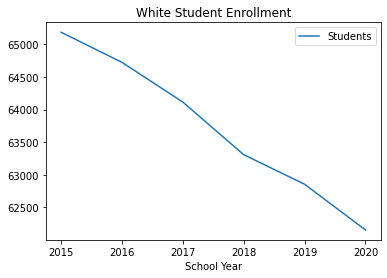

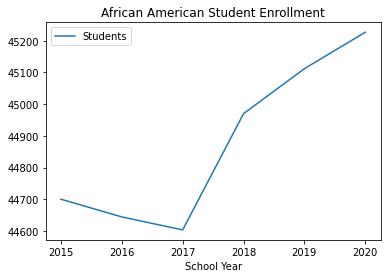

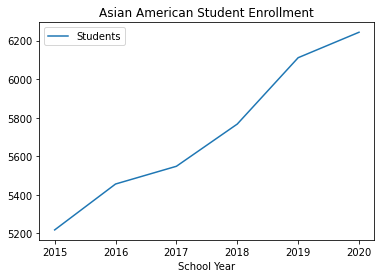

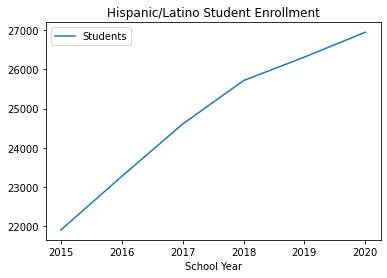

In [15]:
all = "All Students"
#FIXME This can probably be written better
#All Students Data Frame with each year
all_years = df.loc[(df["District"] == "State of Delaware") & (df["Gender"] == all) & (df["Grade"] == all) & (df["SpecialDemo"] == all) & (df["Geography"] == all), ["Race", "Students", "School Year"]]
###Dropping Empty All Student Data
indexs = all_years[all_years["Race"] == "All Students"].index
all_years.drop(indexs)

#Getting students seperated by year
#students15 = hold.loc[hold["School Year"] == 2015,["Race", "Students", "School Year"]]
#students15.plot.bar(x="Race", y = "Students", figsize=(15,5))
all_years[all_years["Race"] == "White"].plot(x="School Year", y = "Students", title = "White Student Enrollment")
all_years[all_years["Race"] == "African American"].plot(x="School Year", y = "Students", title = "African American Student Enrollment")
all_years[all_years["Race"] == "Asian American"].plot(x="School Year", y = "Students", title = "Asian American Student Enrollment")
all_years[all_years["Race"] == "Hispanic/Latino"].plot(x="School Year", y = "Students", title = "Hispanic/Latino Student Enrollment")




### Pearson's R

In [21]:
years = [2015,2016,2017,2018,2019,2020]
White_enrollment_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "White"],years)
African_American_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "African American"], years)
Asian_American_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "Asian American"], years)
Hispanic_r = stats.pearsonr(all_years["Students"][all_years["Race"] == "Hispanic/Latino"], years)

print("White Student Enrollment r: ", White_enrollment_r[0])
print("African American Student Enrollment r: ", African_American_r[0])
print("Asian American r: ", Asian_American_r[0])
print("Hispanic/Latino r: ", Hispanic_r[0])



White_enrollment_r

White Student Enrollment r:  -0.9974150969419623
African American Student Enrollment r:  0.8939061809517638
Asian American r:  0.9892662569850617
Hispanic/Latino r:  0.9851881711114994


(-0.9974150969419623, 1.0013949925012147e-05)

In [22]:
w15 = all_years["Students"][(all_years["Race"] == "White")& (all_years["School Year"] == 2015)].values
b15 = all_years["Students"][(all_years["Race"] == "African American")& (all_years["School Year"] == 2015)].values
w20 = all_years["Students"][(all_years["Race"] == "White")& (all_years["School Year"] == 2020)].values
b20 = all_years["Students"][(all_years["Race"] == "African American")& (all_years["School Year"] == 2020)].values
a15 =all_years["Students"][(all_years["Race"] == "Asian American")& (all_years["School Year"] == 2015)].values
a20 =all_years["Students"][(all_years["Race"] == "Asian American")& (all_years["School Year"] == 2020)].values

w_change = ((w20-w15)/w20)*100
b_change = ((b20-b15)/b20)*100
a_change = ((a20-a15)/a20)*100
print("White Change in Enrollemnt: ", w_change)
print("African American change in Enrollment: ", b_change)
print("Asian American change in Enrollment: ", a_change)

White Change in Enrollemnt:  [-4.87659684]
African American change in Enrollment:  [1.16523316]
Asian American change in Enrollment:  [16.4183886]


In [17]:
def calc_percent_change(original, new)->float:
    return ((new-old)/old)*100



dist_df = df.loc[(df["Gender"] == all) & (df["Grade"] == all) & (df["SpecialDemo"] == all) & (df["Geography"] == all), ["District","Race", "Students", "School Year"]]
y16 = dist_df[(dist_df["School Year"] == 2016)].index
y17 = dist_df[(dist_df["School Year"] == 2017)].index
y18 = dist_df[(dist_df["School Year"] == 2018)].index
y19 = dist_df[(dist_df["School Year"] == 2019)].index
dist_df = dist_df.drop(y16)
dist_df = dist_df.drop(y17)
dist_df = dist_df.drop(y18)
dist_df = dist_df.drop(y19)
for district in dist_list:
    test = dist_df["Students"].loc[(dist_df["District"] == district) & (dist_df["School Year"] == 2015) & (dist_df["Race"] == "White")].values
    print(district)
    print(test)
#dist_df.loc[(dist_df["District"] == "Odyssey Charter School") & (dist_df["School Year"] == 2015) & (dist_df["Race"] == "White")]


State of Delaware
[65185.]
Odyssey Charter School
[589. 589.]
Colonial School District
[3361.  168.  218.  209.  154.  425.  349.  135.   51.  113.  391.  266.
  187.  657.   40.   40.]
Woodbridge School District
[1263.  305.  329.  288.  341.]
Caesar Rodney School District
[4574.  420.  355.  305.   25.  247.  305.  357.  494.  166.  452. 1193.
  130.  152.]
Laurel School District
[  nan 1251.  328.  248.  308.  364.]
Gateway Lab School
[138. 138.]
Milford School District
[2301.  258.  223.  329.  308.  592.  600.]
Capital School District
[ 629.   99.  333. 2264.   95.  140.  143.   26.  108.  301.   64.  308.
   32.]
Newark Charter School
[1273. 1273.]
Seaford School District
[1535.  245.  164.  267.  174.  370.  328.]
Smyrna School District
[3418.  369.  914.  393.  348.  279.  542.  240.  348.]
Brandywine School District
[5469.  360.  246.  238.  325.  346.  201.  420.   15.  391.  356.  543.
  328.  414.  663.  544.  100.]
Christina School District
[  77. 5605.  108.  241.  117.  